**Project Name- Bike Sharing Demand Prediction**

**Loading necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mpl

**GitHub link-**
https://github.com/pawankumar0991/bike_sharing_demand_project/blob/main/Bike_Sharing_Demand_Prediction_Revised.ipynb


**Project Summary-**

The Seoul Bike Sharing dataset contains daily records including various features such as `Date`, `Rented Bike Count`, `Hour`, `Temperature`, `Humidity`, `Windspeed`, `Visibility`, `Dew Point Temperature`, `Solar Radiation`, `Rainfall`, `Snowfall`, `Seasons`, `Holiday`, and `Functioning Day`. I will begin by performing Exploratory Data Analysis (EDA) to understand the dataset's structure, check for missing values, and visualize trends and relationships between features and the target variable, `Rented Bike Count`. Next, I will detect and remove outliers using the Interquartile Range (IQR) method to improve the dataset's quality. To ensure the stability of my models, I will measure multicollinearity using Variance Inflation Factor (VIF) and remove highly collinear features like `Dew Point Temperature`. Following this, I will train an initial linear regression model to establish a performance baseline. I will then apply data transformation techniques, specifically PowerTransformer for normalization and RobustScaler for handling remaining outliers, to enhance model performance. Subsequently, I will train and evaluate advanced models such as DecisionTreeRegressor, RandomForestRegressor, and XGBoost to capture complex patterns in the data. Lastly, I will analyze feature importance using these tree-based models to identify key predictors. This structured approach will enable me to build robust predictive models and derive valuable insights for the bike-sharing service.

**Problem Statement-**

***Optimizing Bike Availability and Enhancing Operational Efficiency for Seoul's Bike Sharing System***

In [ ]:
data = pd.read_csv('/content/SeoulBikeData.csv',encoding='latin-1')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# renaming columns
df.rename(columns={'Snowfall (cm)':'snowfall','Rainfall(mm)':'rainfall','Solar Radiation (MJ/m2)':'solar_radiation','Dew point temperature(°C)':'Dew_point_temp','Visibility (10m)':'visibility','Wind speed (m/s)':'wind_speed','Humidity(%)':'Humidity','Temperature(°C)':'temp','Rented Bike Count':'count','Functioning Day':'Working_day'},inplace=True)

In [ ]:

df.columns

Index(['Date', 'count', 'Hour', 'temp', 'Humidity', 'wind_speed', 'visibility',
       'Dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'Seasons',
       'Holiday', 'Working_day'],
      dtype='object')

In [ ]:
# getting information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   count            8760 non-null   int64  
 2   Hour             8760 non-null   int64  
 3   temp             8760 non-null   float64
 4   Humidity         8760 non-null   int64  
 5   wind_speed       8760 non-null   float64
 6   visibility       8760 non-null   int64  
 7   Dew_point_temp   8760 non-null   float64
 8   solar_radiation  8760 non-null   float64
 9   rainfall         8760 non-null   float64
 10  snowfall         8760 non-null   float64
 11  Seasons          8760 non-null   object 
 12  Holiday          8760 non-null   object 
 13  Working_day      8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
df.describe(include='all').T

count unique         top  freq         mean         std  \
Date               8760    365  30/11/2018    24          NaN         NaN   
count            8760.0    NaN         NaN   NaN   704.602055  644.997468   
Hour             8760.0    NaN         NaN   NaN         11.5    6.922582   
temp             8760.0    NaN         NaN   NaN    12.882922   11.944825   
Humidity         8760.0    NaN         NaN   NaN    58.226256   20.362413   
wind_speed       8760.0    NaN         NaN   NaN     1.724909      1.0363   
visibility       8760.0    NaN         NaN   NaN  1436.825799  608.298712   
Dew_point_temp   8760.0    NaN         NaN   NaN     4.073813   13.060369   
solar_radiation  8760.0    NaN         NaN   NaN     0.569111    0.868746   
rainfall         8760.0    NaN         NaN   NaN     0.148687    1.128193   
snowfall         8760.0    NaN         NaN   NaN     0.075068    0.436746   
Seasons            8760      4      Spring  2208          NaN         NaN   
Holiday            8760      2  No Holiday  8328          NaN         NaN   
Working_day        8760      2         Yes  8465          NaN         NaN   

                  min    25%     50%      75%     max  
Date              NaN    NaN     NaN      NaN     NaN  
count             0.0  191.0   504.5  1065.25  3556.0  
Hour              0.0   5.75    11.5    17.25    23.0  
temp            -17.8    3.5    13.7     22.5    39.4  
Humidity          0.0   42.0    57.0     74.0    98.0  
wind_speed        0.0    0.9     1.5      2.3     7.4  
visibility       27.0  940.0  1698.0   2000.0  2000.0  
Dew_point_temp  -30.6   -4.7     5.1     14.8    27.2  
solar_radiation   0.0    0.0    0.01     0.93    3.52  
rainfall          0.0    0.0     0.0      0.0    35.0  
snowfall          0.0    0.0     0.0      0.0     8.8  
Seasons           NaN    NaN     NaN      NaN     NaN  
Holiday           NaN    NaN     NaN      NaN     NaN  
Working_day       NaN    NaN     NaN      NaN     NaN

In [ ]:
# now checking for null and duplicate values

df.isnull().sum()

Date               0
count              0
Hour               0
temp               0
Humidity           0
wind_speed         0
visibility         0
Dew_point_temp     0
solar_radiation    0
rainfall           0
snowfall           0
Seasons            0
Holiday            0
Working_day        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# now converting date object to datetime

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

df['Day'] =  df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['weekday'] = df['Date'].dt.day_name()
df['quarter'] = df['Date'].dt.quarter


In [ ]:
df.dtypes

Date               datetime64[ns]
count                       int64
Hour                        int64
temp                      float64
Humidity                    int64
wind_speed                float64
visibility                  int64
Dew_point_temp            float64
solar_radiation           float64
rainfall                  float64
snowfall                  float64
Seasons                    object
Holiday                    object
Working_day                object
Day                         int32
month                       int32
year                        int32
weekday                    object
quarter                     int32
dtype: object

In [ ]:
df.tail()

Date  count  Hour  temp  Humidity  wind_speed  visibility  \
8755 2018-11-30   1003    19   4.2        34         2.6        1894   
8756 2018-11-30    764    20   3.4        37         2.3        2000   
8757 2018-11-30    694    21   2.6        39         0.3        1968   
8758 2018-11-30    712    22   2.1        41         1.0        1859   
8759 2018-11-30    584    23   1.9        43         1.3        1909   

      Dew_point_temp  solar_radiation  rainfall  snowfall Seasons     Holiday  \
8755           -10.3              0.0       0.0       0.0  Autumn  No Holiday   
8756            -9.9              0.0       0.0       0.0  Autumn  No Holiday   
8757            -9.9              0.0       0.0       0.0  Autumn  No Holiday   
8758            -9.8              0.0       0.0       0.0  Autumn  No Holiday   
8759            -9.3              0.0       0.0       0.0  Autumn  No Holiday   

     Working_day  Day  month  year weekday  quarter  
8755         Yes   30     11  2018  Friday        4  
8756         Yes   30     11  2018  Friday        4  
8757         Yes   30     11  2018  Friday        4  
8758         Yes   30     11  2018  Friday        4  
8759         Yes   30     11  2018  Friday        4

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df.head()

count  Hour  temp  Humidity  wind_speed  visibility  Dew_point_temp  \
0    254     0  -5.2        37         2.2        2000           -17.6   
1    204     1  -5.5        38         0.8        2000           -17.6   
2    173     2  -6.0        39         1.0        2000           -17.7   
3    107     3  -6.2        40         0.9        2000           -17.6   
4     78     4  -6.0        36         2.3        2000           -18.6   

   solar_radiation  rainfall  snowfall Seasons     Holiday Working_day  Day  \
0              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
1              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
2              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
3              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
4              0.0       0.0       0.0  Winter  No Holiday         Yes    1   

   month  year weekday  quarter  
0     12  2017  Friday        4  
1     12  2017  Friday        4  
2     12  2017  Friday        4  
3     12  2017  Friday        4  
4     12  2017  Friday        4

**EDA**

<Figure size 500x500 with 0 Axes>

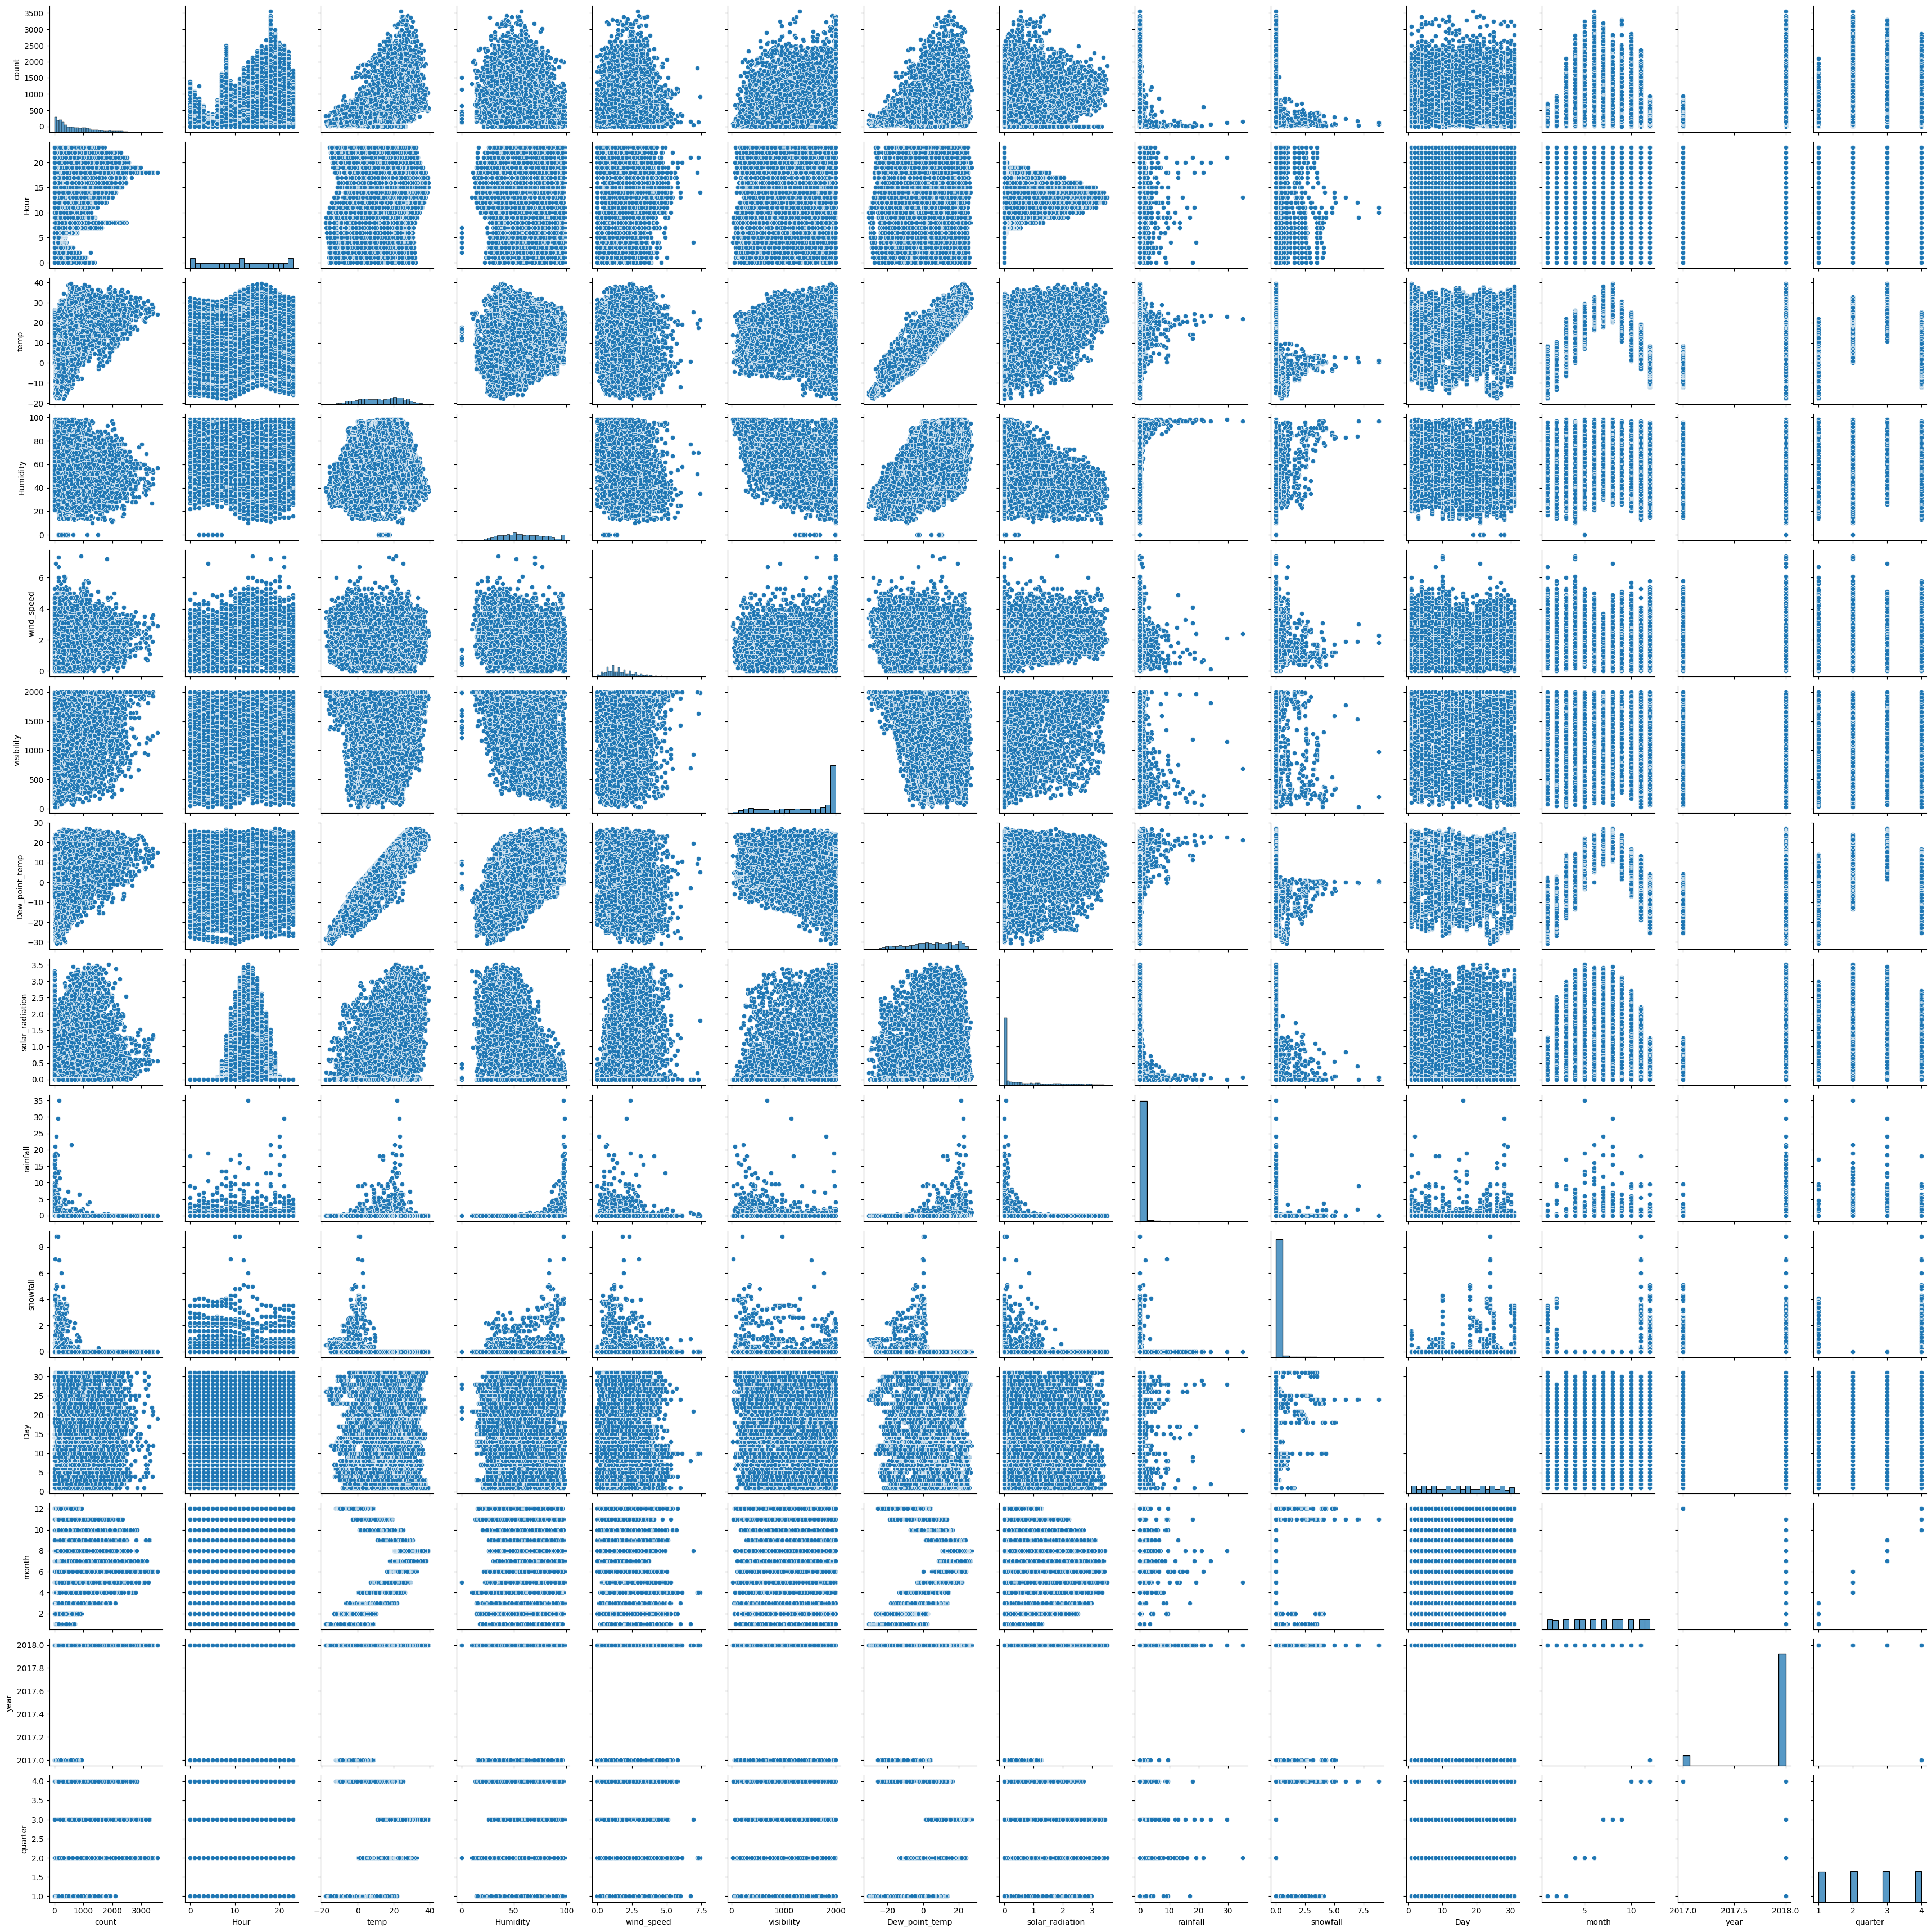

In [ ]:
mpl.figure(figsize=(5,5))
sns.pairplot(df)

In [ ]:
df.head()

count  Hour  temp  Humidity  wind_speed  visibility  Dew_point_temp  \
0    254     0  -5.2        37         2.2        2000           -17.6   
1    204     1  -5.5        38         0.8        2000           -17.6   
2    173     2  -6.0        39         1.0        2000           -17.7   
3    107     3  -6.2        40         0.9        2000           -17.6   
4     78     4  -6.0        36         2.3        2000           -18.6   

   solar_radiation  rainfall  snowfall Seasons     Holiday Working_day  Day  \
0              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
1              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
2              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
3              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
4              0.0       0.0       0.0  Winter  No Holiday         Yes    1   

   month  year weekday  quarter  
0     12  2017  Friday        4  
1     12  2017  Friday        4  
2     12  2017  Friday        4  
3     12  2017  Friday        4  
4     12  2017  Friday        4

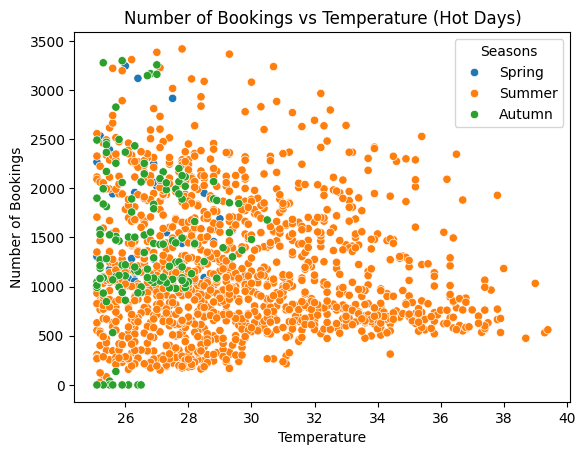

In [ ]:

sns.scatterplot(x='temp', y='count', data=df[df['temp'] > 25],hue='Seasons')
mpl.xlabel('Temperature')
mpl.ylabel('Number of Bookings')
mpl.title('Number of Bookings vs Temperature (Hot Days)')
mpl.show()


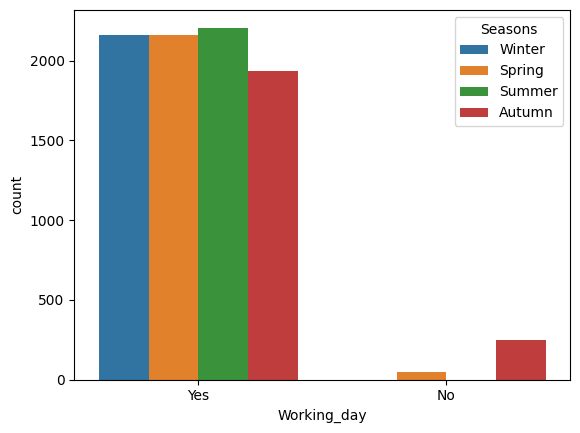

In [ ]:
sns.countplot(x='Working_day',data=df,hue='Seasons')
mpl.show()

<Axes: xlabel='month', ylabel='count'>

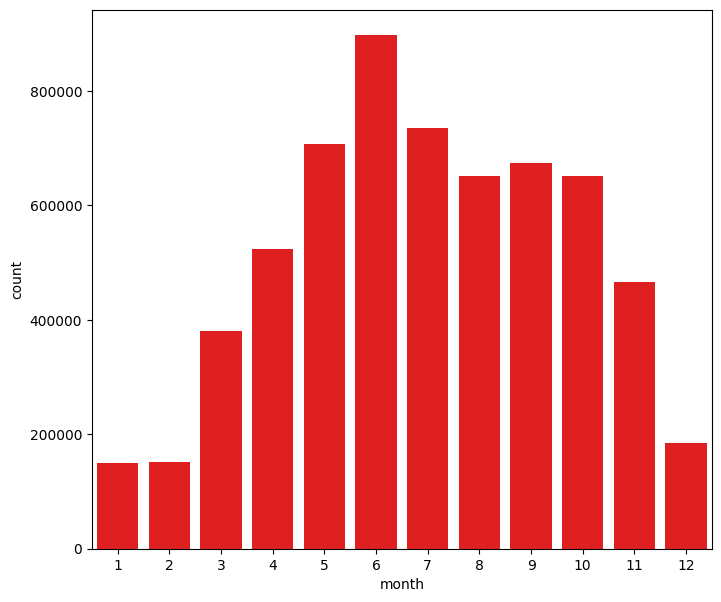

In [ ]:
mpl.figure(figsize=(8,7))
month = df.groupby(by='month').sum().reset_index()
sns.barplot(x='month',y='count',data=month,color='red')

<Axes: xlabel='Day', ylabel='count'>

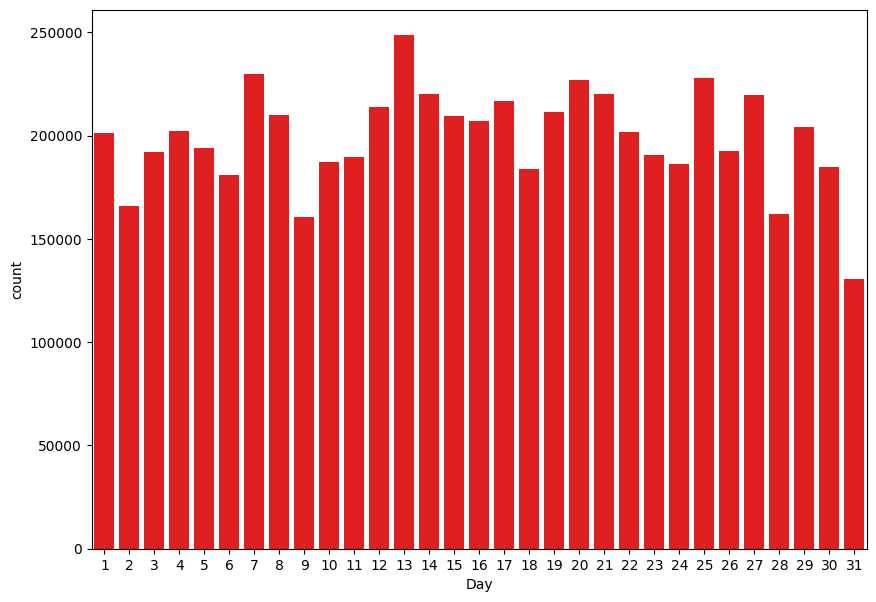

In [ ]:
mpl.figure(figsize=(10,7))
day = df.groupby(by='Day').sum().reset_index()
sns.barplot(x='Day',y='count',data=day,color='red')

<Axes: xlabel='weekday', ylabel='count'>

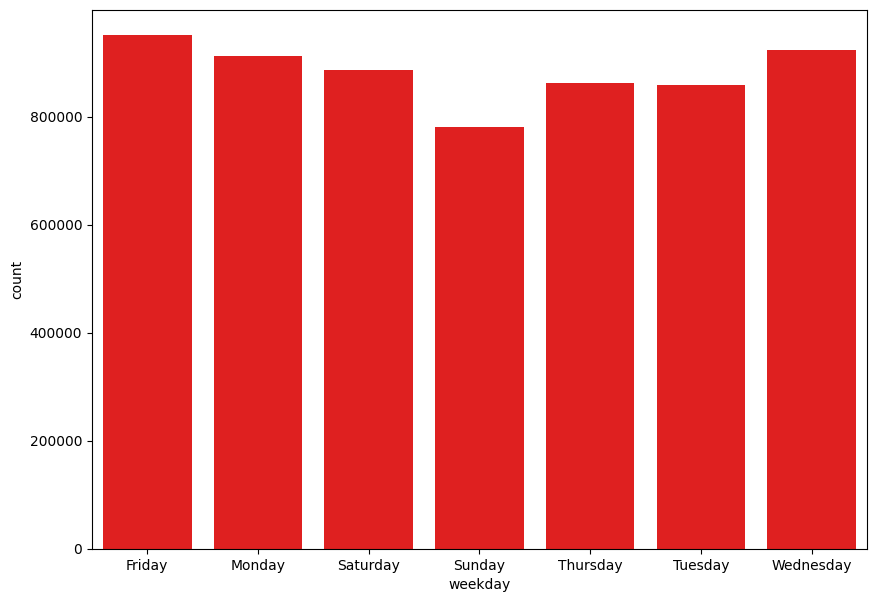

In [ ]:
mpl.figure(figsize=(10,7))
weekday = df.groupby(by='weekday').sum().reset_index()
sns.barplot(x='weekday',y='count',data=weekday,color='red')

<Axes: xlabel='Hour', ylabel='count'>

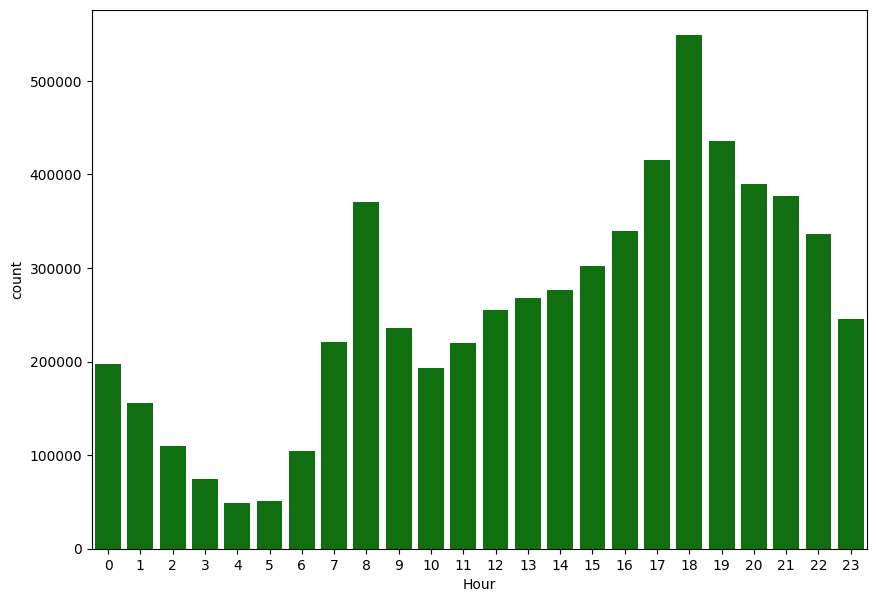

In [ ]:
mpl.figure(figsize=(10,7))
hour = df.groupby(by='Hour').sum().reset_index()
sns.barplot(x='Hour',y='count',data=hour,color='green')

<Axes: xlabel='Hour', ylabel='count'>

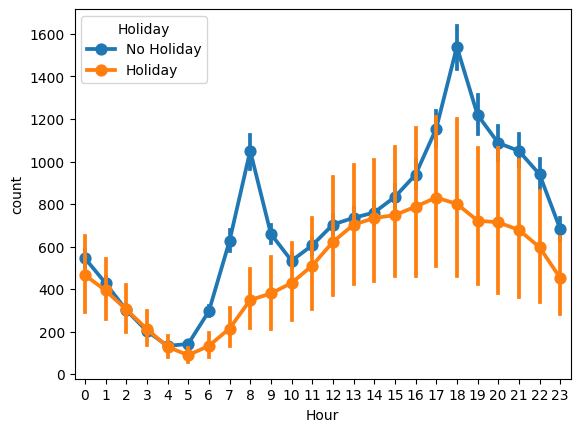

In [ ]:
sns.pointplot(data=df, x="Hour", y="count",hue="Holiday")

<Axes: xlabel='quarter', ylabel='count'>

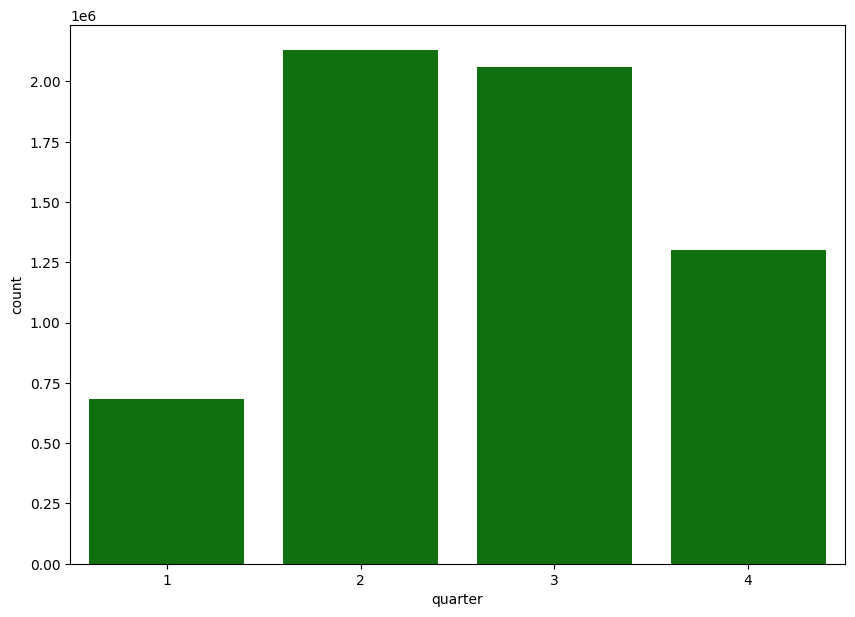

In [ ]:
mpl.figure(figsize=(10,7))
quart = df.groupby(by='quarter').sum().reset_index()
sns.barplot(x='quarter',y='count',data=quart,color='green')

<Axes: xlabel='Holiday', ylabel='count'>

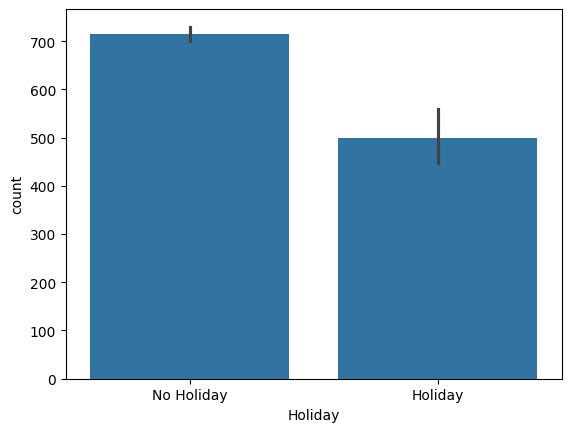

In [ ]:
sns.barplot(x='Holiday',y='count',data=df)

<Axes: xlabel='Seasons', ylabel='count'>

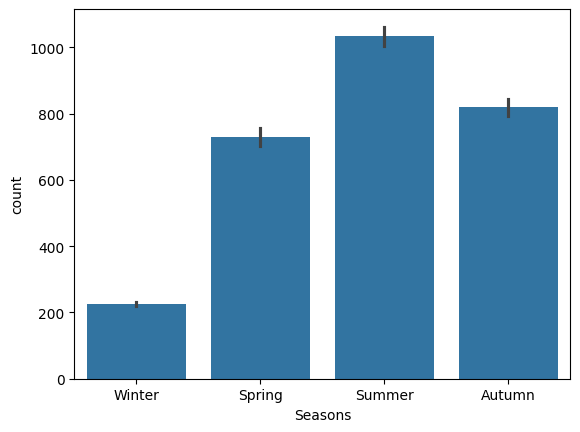

In [ ]:
sns.barplot(x='Seasons',y='count',data=df)

<Axes: xlabel='snowfall', ylabel='count'>

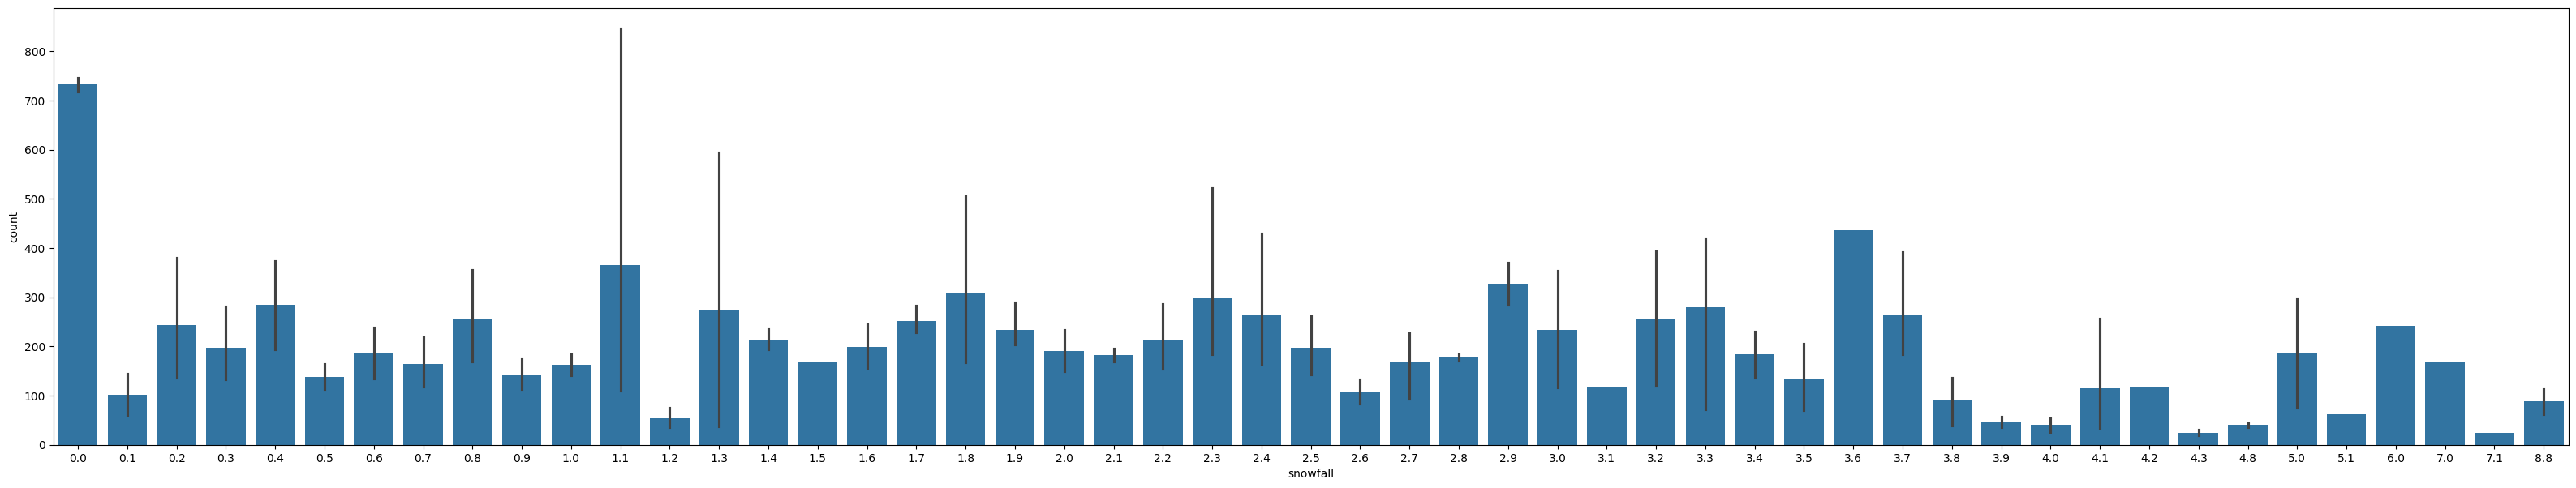

In [ ]:
mpl.figure(figsize=(40,7))
sns.barplot(x='snowfall',y='count',data=df)

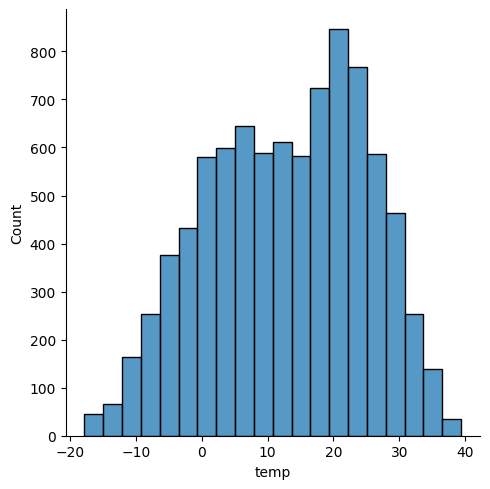

In [ ]:
sns.displot(df['temp'],bins=20)

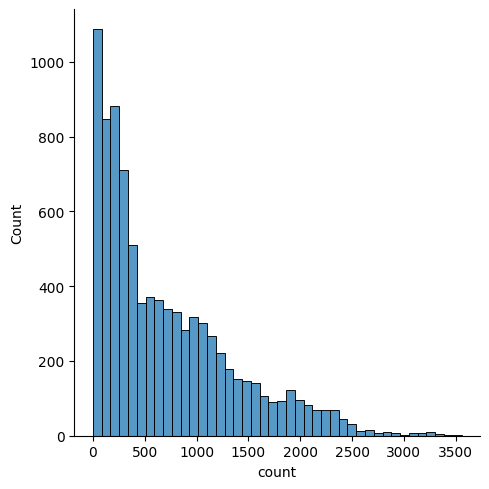

In [ ]:
sns.displot(df['count']) # showing maximum bike demand

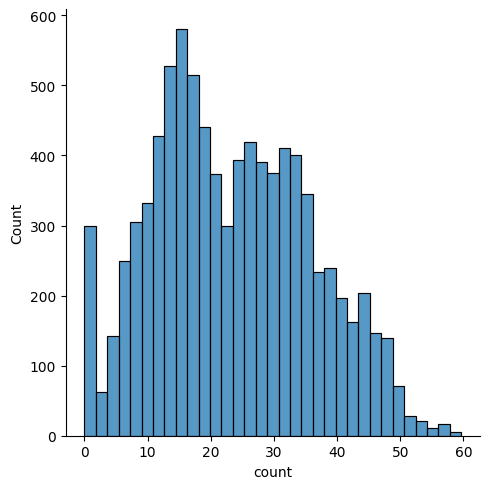

In [ ]:
# applyting math numpy math function to make data as normal

sns.displot(np.sqrt(df['count']))

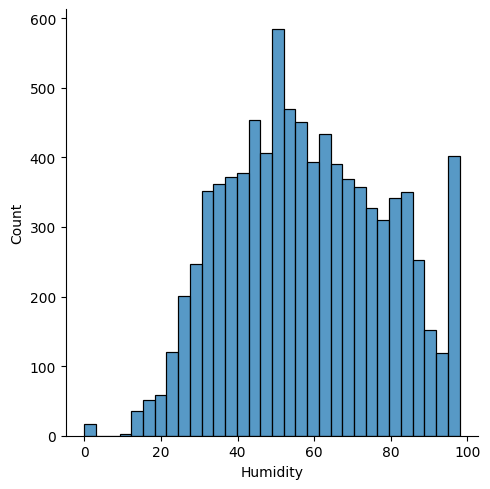

In [ ]:
sns.displot(df['Humidity'])

<Axes: xlabel='temp', ylabel='count'>

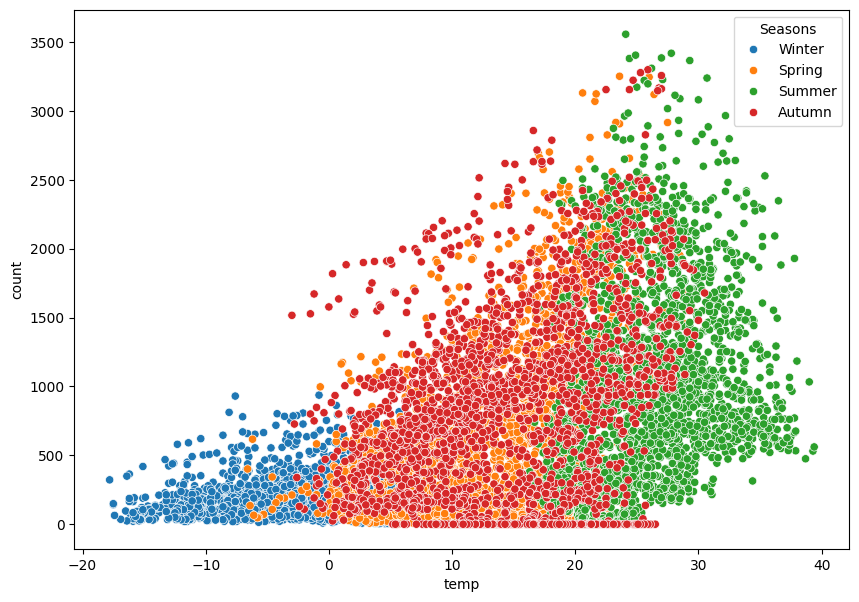

In [ ]:
mpl.figure(figsize=(10,7))
sns.scatterplot(x='temp',y='count',data=df,hue='Seasons')

<Axes: xlabel='solar_radiation', ylabel='count'>

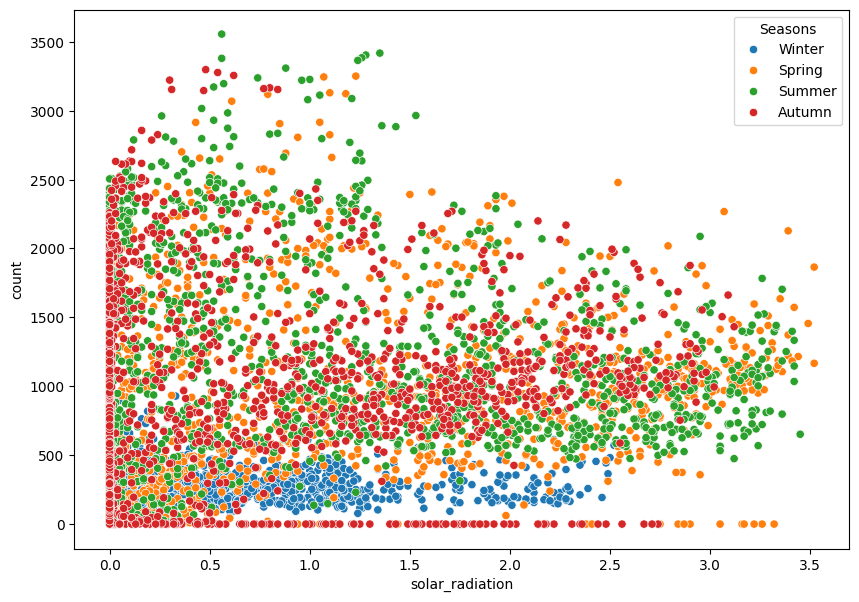

In [ ]:
mpl.figure(figsize=(10,7))
sns.scatterplot(x="solar_radiation", y="count", data=df,hue='Seasons')

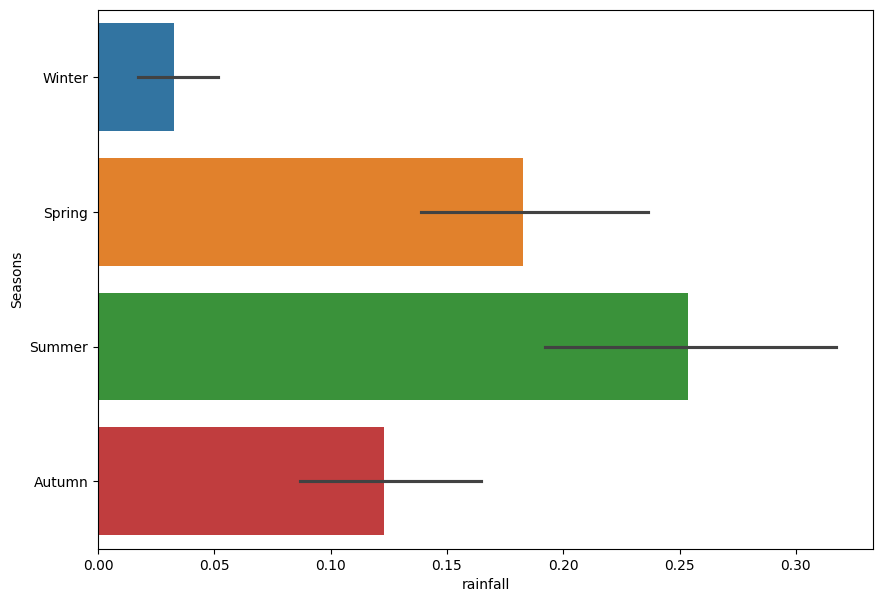

In [ ]:
mpl.figure(figsize=(10,7))
sns.barplot(x="rainfall", y="Seasons", data=df,hue='Seasons');

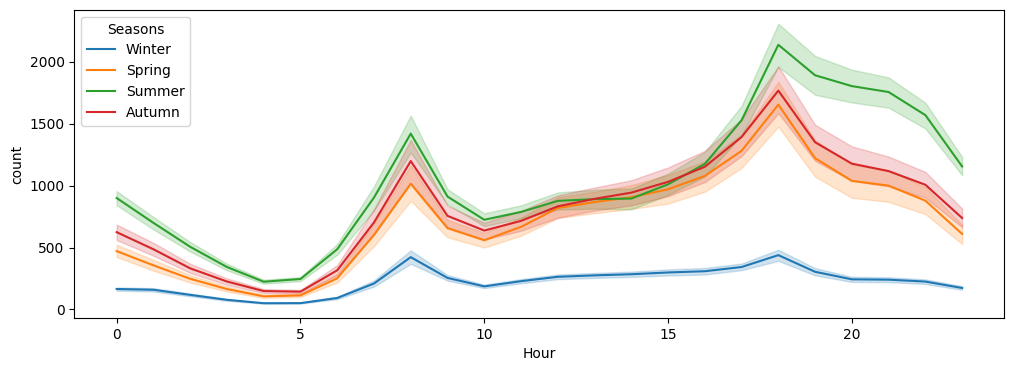

In [ ]:
mpl.figure(figsize=(12,4), dpi=100)
graph = sns.lineplot(data=df, x="Hour", y="count", hue="Seasons")

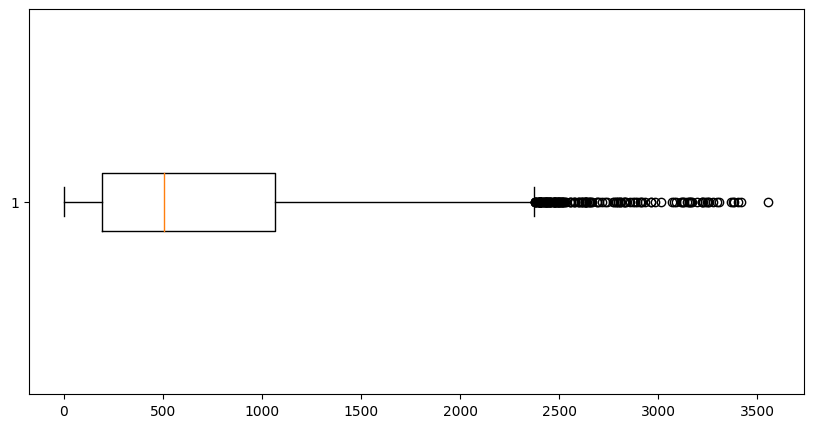

In [ ]:
mpl.figure(figsize=(10,5))
mpl.boxplot(df['count'],vert=False)
mpl.show()

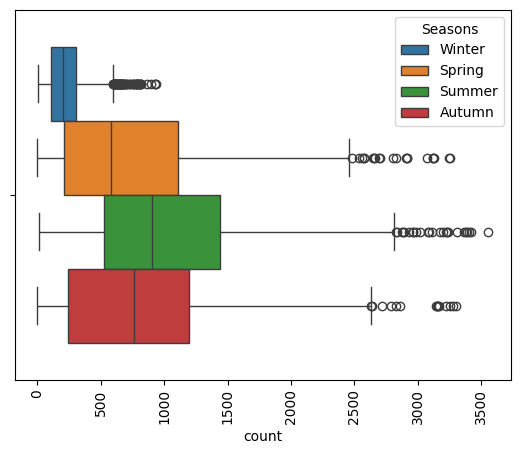

In [ ]:
sns.boxplot(x=df['count'],data=df,hue=df['Seasons'])
mpl.xticks(rotation=90);

In [ ]:
df.columns

Index(['count', 'Hour', 'temp', 'Humidity', 'wind_speed', 'visibility',
       'Dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'Seasons',
       'Holiday', 'Working_day', 'Day', 'month', 'year', 'weekday', 'quarter'],
      dtype='object')

In [ ]:
# func to remove outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


columns_to_check = ['count', 'temp', 'Humidity', 'wind_speed', 'visibility', 'Dew_point_temp', 'solar_radiation']


for column in columns_to_check:
    df = remove_outliers(df, column)


df.head()

count  Hour  temp  Humidity  wind_speed  visibility  Dew_point_temp  \
0    254     0  -5.2        37         2.2        2000           -17.6   
1    204     1  -5.5        38         0.8        2000           -17.6   
2    173     2  -6.0        39         1.0        2000           -17.7   
3    107     3  -6.2        40         0.9        2000           -17.6   
4     78     4  -6.0        36         2.3        2000           -18.6   

   solar_radiation  rainfall  snowfall Seasons     Holiday Working_day  Day  \
0              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
1              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
2              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
3              0.0       0.0       0.0  Winter  No Holiday         Yes    1   
4              0.0       0.0       0.0  Winter  No Holiday         Yes    1   

   month  year weekday  quarter  
0     12  2017  Friday        4  
1     12  2017  Friday        4  
2     12  2017  Friday        4  
3     12  2017  Friday        4  
4     12  2017  Friday        4

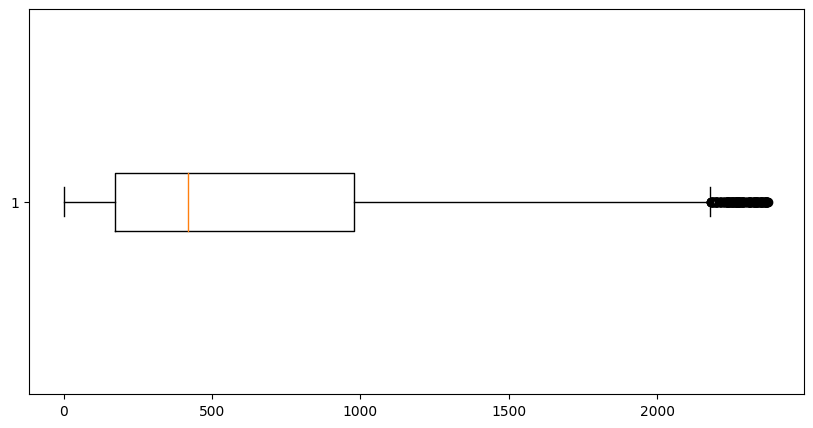

In [ ]:
mpl.figure(figsize=(10,5))
mpl.boxplot(df['count'],vert=False)
mpl.show()

**cheking skewness**

In [ ]:
df[["count", "temp", "Humidity", "wind_speed", "rainfall", "snowfall", "solar_radiation",'Hour','visibility','Dew_point_temp',
   'Day','month','year']].skew().sort_values(ascending=True)

year               -2.802418
visibility         -0.629162
Dew_point_temp     -0.304262
temp               -0.130273
Humidity           -0.061134
month              -0.041466
Day                 0.001186
Hour                0.105175
wind_speed          0.703369
count               1.082026
solar_radiation     1.603213
snowfall            7.993404
rainfall           13.850629
dtype: float64

<Axes: >

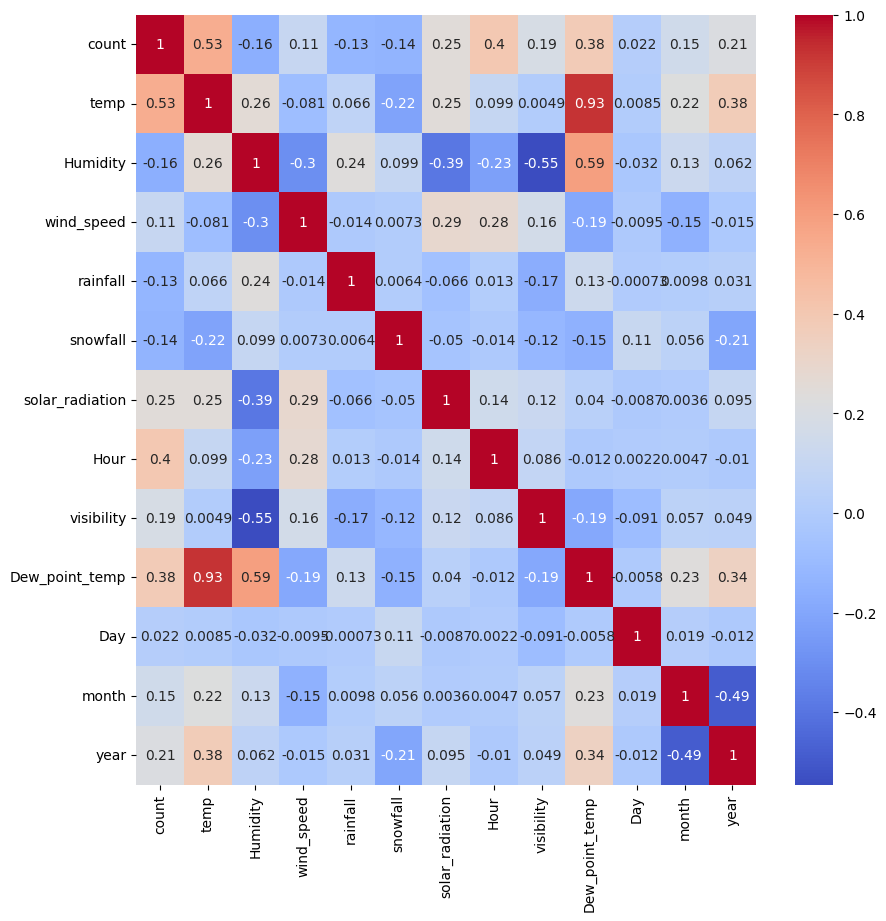

In [ ]:
mpl.figure(figsize=(10,10))
corr = df[["count", "temp", "Humidity", "wind_speed", "rainfall", "snowfall", "solar_radiation",'Hour','visibility','Dew_point_temp',
   'Day','month','year']].corr()
sns.heatmap(corr, annot=True,cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def get_vif(df):
  vif = pd.DataFrame()
  vif['features'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
  return vif

In [ ]:
not_for_vif =['Day','month','year','count']

In [ ]:
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

features        VIF
0             Hour   3.975290
1             temp  32.041836
2         Humidity   7.523138
3       wind_speed   4.902848
4       visibility   8.965647
5   Dew_point_temp  18.309178
6  solar_radiation   2.208867
7         rainfall   1.083725
8         snowfall   1.135962
9          quarter   6.548759

In [ ]:
not_for_vif =['Day','month','year','count','Dew_point_temp']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

features       VIF
0             Hour  3.595077
1             temp  2.839387
2         Humidity  6.617321
3       wind_speed  4.627849
4       visibility  5.241417
5  solar_radiation  1.845726
6         rainfall  1.081051
7         snowfall  1.134128
8          quarter  6.329216

In [ ]:
# droping due_point column as it has hight vif
df.drop(['Dew_point_temp'],axis=1,inplace=True)

**label encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   count            7760 non-null   int64  
 1   Hour             7760 non-null   int64  
 2   temp             7760 non-null   float64
 3   Humidity         7760 non-null   int64  
 4   wind_speed       7760 non-null   float64
 5   visibility       7760 non-null   int64  
 6   solar_radiation  7760 non-null   float64
 7   rainfall         7760 non-null   float64
 8   snowfall         7760 non-null   float64
 9   Seasons          7760 non-null   object 
 10  Holiday          7760 non-null   object 
 11  Working_day      7760 non-null   object 
 12  Day              7760 non-null   int32  
 13  month            7760 non-null   int32  
 14  year             7760 non-null   int32  
 15  weekday          7760 non-null   object 
 16  quarter          7760 non-null   int32  
dtypes: float64(5), int3

In [ ]:
cat_col = ['Seasons','Holiday','Working_day','weekday']

In [ ]:
#checking value counts
df['Seasons'].value_counts()

Seasons
Winter    2072
Autumn    2011
Spring    1863
Summer    1814
Name: count, dtype: int64

In [ ]:
df['Holiday'].value_counts()

Holiday
No Holiday    7374
Holiday        386
Name: count, dtype: int64

In [ ]:
df['Working_day'].value_counts()

Working_day
Yes    7490
No      270
Name: count, dtype: int64

In [ ]:
df['weekday'].value_counts()

weekday
Sunday       1135
Friday       1124
Thursday     1124
Tuesday      1113
Monday       1098
Wednesday    1090
Saturday     1076
Name: count, dtype: int64

In [ ]:
df['Working_day'] = df['Working_day'].map({'Yes':1,'No':0})

In [ ]:
df['Holiday'] = df['Holiday'].map({'Holiday':1,'No Holiday':0})

In [ ]:
# using onehot encoding (dummies) for seasona sand weekday
season_df = pd.get_dummies(df['Seasons'],drop_first=True,dtype=np.uint8)
weekday_df = pd.get_dummies(df['weekday'],drop_first=True,dtype=np.uint8)

In [ ]:
df = pd.concat([df,season_df,weekday_df],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   count            7760 non-null   int64  
 1   Hour             7760 non-null   int64  
 2   temp             7760 non-null   float64
 3   Humidity         7760 non-null   int64  
 4   wind_speed       7760 non-null   float64
 5   visibility       7760 non-null   int64  
 6   solar_radiation  7760 non-null   float64
 7   rainfall         7760 non-null   float64
 8   snowfall         7760 non-null   float64
 9   Seasons          7760 non-null   object 
 10  Holiday          7760 non-null   int64  
 11  Working_day      7760 non-null   int64  
 12  Day              7760 non-null   int32  
 13  month            7760 non-null   int32  
 14  year             7760 non-null   int32  
 15  weekday          7760 non-null   object 
 16  quarter          7760 non-null   int32  
 17  Spring           77

In [ ]:
df.drop(['Seasons','weekday'],axis=1,inplace=True)

In [ ]:
# checking dataser after encoding
df.head()

count  Hour  temp  Humidity  wind_speed  visibility  solar_radiation  \
0    254     0  -5.2        37         2.2        2000              0.0   
1    204     1  -5.5        38         0.8        2000              0.0   
2    173     2  -6.0        39         1.0        2000              0.0   
3    107     3  -6.2        40         0.9        2000              0.0   
4     78     4  -6.0        36         2.3        2000              0.0   

   rainfall  snowfall  Holiday  ...  quarter  Spring  Summer  Winter  Monday  \
0       0.0       0.0        0  ...        4       0       0       1       0   
1       0.0       0.0        0  ...        4       0       0       1       0   
2       0.0       0.0        0  ...        4       0       0       1       0   
3       0.0       0.0        0  ...        4       0       0       1       0   
4       0.0       0.0        0  ...        4       0       0       1       0   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  
0         0       0         0        0          0  
1         0       0         0        0          0  
2         0       0         0        0          0  
3         0       0         0        0          0  
4         0       0         0        0          0  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   count            7760 non-null   int64  
 1   Hour             7760 non-null   int64  
 2   temp             7760 non-null   float64
 3   Humidity         7760 non-null   int64  
 4   wind_speed       7760 non-null   float64
 5   visibility       7760 non-null   int64  
 6   solar_radiation  7760 non-null   float64
 7   rainfall         7760 non-null   float64
 8   snowfall         7760 non-null   float64
 9   Holiday          7760 non-null   int64  
 10  Working_day      7760 non-null   int64  
 11  Day              7760 non-null   int32  
 12  month            7760 non-null   int32  
 13  year             7760 non-null   int32  
 14  quarter          7760 non-null   int32  
 15  Spring           7760 non-null   uint8  
 16  Summer           7760 non-null   uint8  
 17  Winter           77

In [ ]:
df.shape

(7760, 24)

**splitting data**

In [ ]:
x =df.drop('count',axis=1)
y = df['count']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)


x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train[:2]

array([[-1.54384807,  0.71559807,  0.28476883, -0.11333824,  0.94205734,
        -0.60945258, -0.13951828, -0.17594009, -0.22769899,  0.18803432,
        -0.65257205, -0.16445404,  0.31826878, -0.46408642, -0.56742942,
         1.8098293 , -0.59719625, -0.40451992, -0.3966677 ,  2.41598932,
        -0.41630899, -0.41043237, -0.40532835],
       [ 1.35618918,  0.86110316, -0.0146798 ,  0.94582749,  0.21778968,
        -0.60945258, -0.13951828, -0.17594009, -0.22769899,  0.18803432,
         1.72706804, -0.4469473 ,  0.31826878, -0.46408642,  1.76233371,
        -0.5525383 , -0.59719625, -0.40451992, -0.3966677 , -0.41390911,
         2.402062  , -0.41043237, -0.40532835]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred[:5]

array([-283.39959666,  516.07282078,  759.97603562,  142.86518694,
        841.67410163])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def evaluate_reg(y_test,y_pred):
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)

  print('MSE:',mse)
  print('RMSE:',rmse)
  print('MAE:',mae)
  print('R2_score:',r2_score(y_test,y_pred))

In [ ]:
evaluate_reg(y_test,y_pred)

MSE: 153771.98432913062
RMSE: 392.13771092453044
MAE: 301.15299676709935
R2_score: 0.5585210053515776


<ipython-input-75-75c24c16f63e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['count']),ax=axes[0],color='brown').set_title(" Input data")
<ipython-input-75-75c24c16f63e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df['count']+0.0000001),ax=axes[1],color='red').set_title("lo

Text(0.5, 1.0, 'Square root')

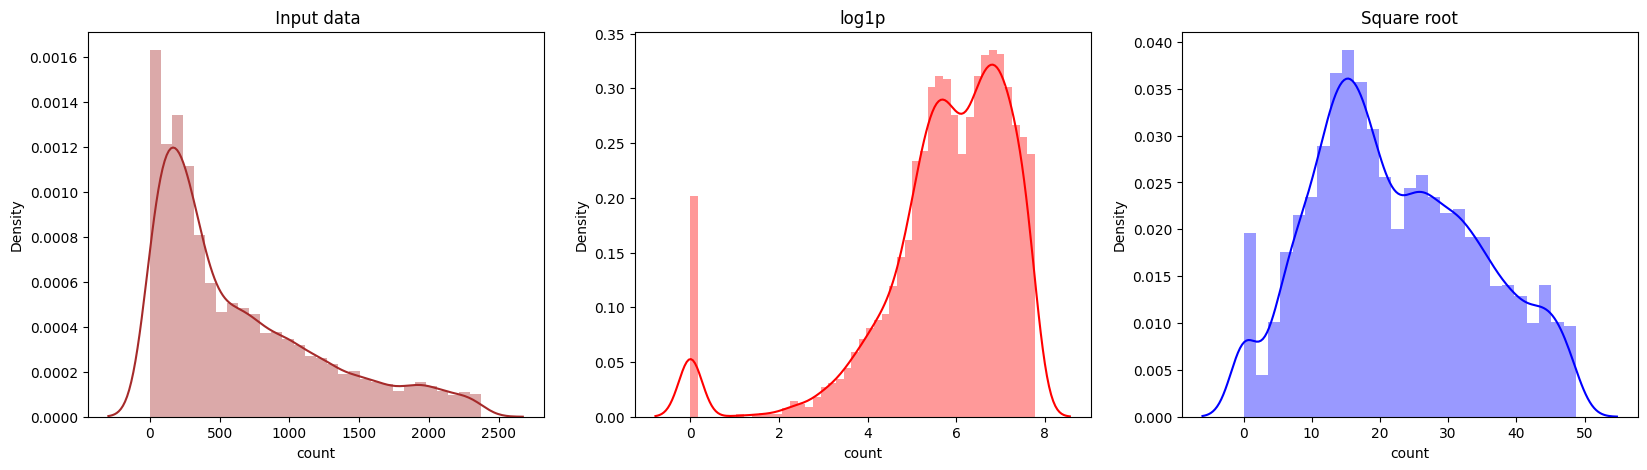

In [ ]:
# visualising by applying some math operations


fig,axes = mpl.subplots(1,3,figsize=(20,5))
sns.distplot((df['count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(df['count']+0.0000001),ax=axes[1],color='red').set_title("log1p")
sns.distplot(np.sqrt(df['count']),ax=axes[2], color='blue').set_title("Square root")

In [ ]:

var=list(df.select_dtypes(include=['float64','int64','uint8']).columns)


from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

In [ ]:
X=df.drop('count',axis=1)
y=df['count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:

print(f'The shape of the train and test  = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test  = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test  = (6208, 23), X_test = (1552, 23)
The shape of the train and test  = (6208,), y_test = (1552,)


In [ ]:
from sklearn.preprocessing import RobustScaler
def func_model(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()
    X_train = rob.fit_transform(X_train)
    X_test = rob.transform(X_test)
    model=model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('Train Score',model.score(X_train,y_train))
    print('Test Score',model.score(X_test,y_test))
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    print('MSE:',mse)
    print('RMSE:',rmse)
    print('R2_score:',r2)

In [ ]:
func_model(LinearRegression(),X,y)

Train Score 0.7213822092073936
Test Score 0.6879704893010161
MSE: 0.2866284478865068
RMSE: 0.535376921324133
R2_score: 0.6879704893010161


**Now we use 2 more different models**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
def evaluate_models(x, y, test_size=0.2, random_state=42):
    # Spliting  data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # Initializing models
    models = {
        'Decision Tree': DecisionTreeRegressor(random_state=random_state),
        'Random Forest': RandomForestRegressor(random_state=random_state),
        'XGBoost': XGBRegressor(random_state=random_state)
    }

    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test,y_pred)

        results[model_name] = {'MSE': mse, 'MAE': mae,
                               'r2-score':r2}
        mpl.scatter(y_test, y_pred)
        mpl.xlabel('Actual Values')
        mpl.ylabel('Predicted Values')
        mpl.title(model_name)
        mpl.show()

    return results

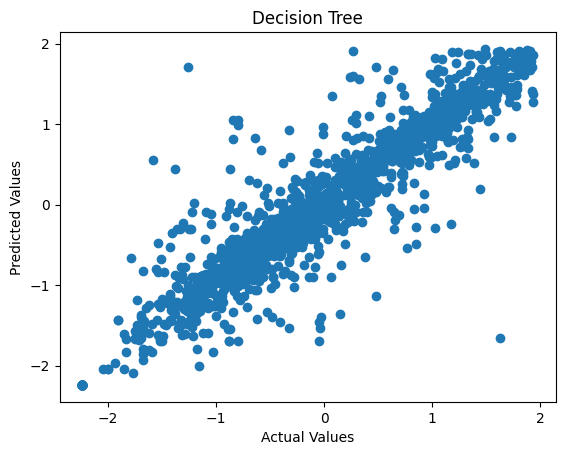

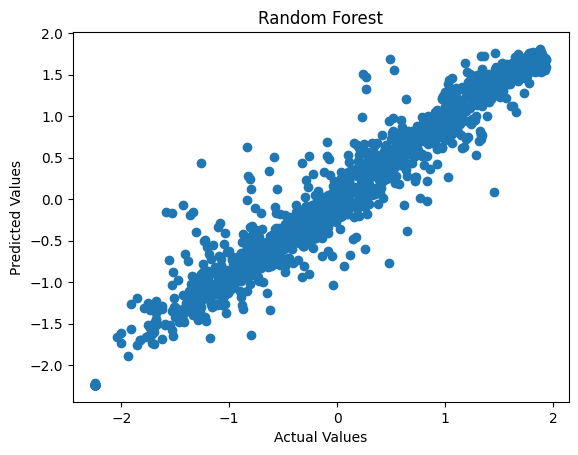

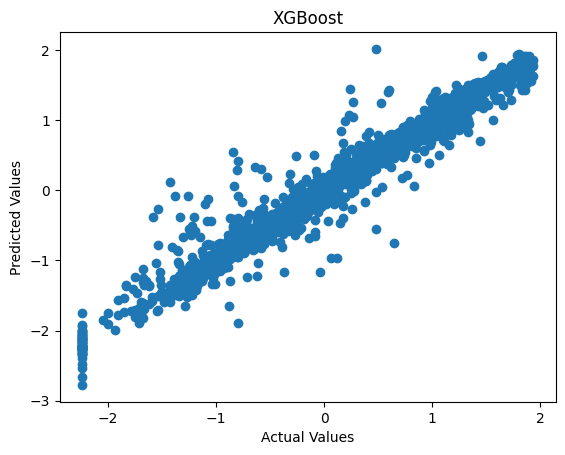

In [ ]:
outputs = evaluate_models(x=X,y=y)

In [ ]:
print(outputs)

{'Decision Tree': {'MSE': 0.13440760150615824, 'MAE': 0.22337047798496926, 'r2-score': 0.8651246081791292}, 'Random Forest': {'MSE': 0.0625999070994028, 'MAE': 0.15808341665915226, 'r2-score': 0.9371822210695783}, 'XGBoost': {'MSE': 0.05345372587858106, 'MAE': 0.14280636649671088, 'r2-score': 0.9463602345301227}}


**hyperparameter tuninng**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
estimators = [int(x) for x in np.linspace(100,500,10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,200,10)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

param_grid = {'n_estimators':estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}


In [ ]:
clf1 = RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5,n_iter=50,n_jobs=-1)
clf1.fit(X_train,y_train)
y_pred_random = clf1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
clf1.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 73}

In [ ]:
# metrics after fine tunning

def evaluate_reg(y_test,y_pred):
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  print('MSE:',mse)
  print('RMSE:',rmse)
  print('MAE:',mae)
  print('R2_score:',r2)

In [ ]:
evaluate_reg(y_test,y_pred_random)

MSE: 0.06262184334637846
RMSE: 0.2502435680419748
MAE: 0.15835790419815382
R2_score: 0.937160208475999


In [ ]:
model_tuned = RandomForestRegressor(n_estimators= 500,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 73)
model_tuned.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=73, max_features='auto', min_samples_split=5,
                      n_estimators=500)

In [ ]:
y_pred_tuned = model_tuned.predict(X_test)

In [ ]:
evaluate_reg(y_test,y_pred_tuned)

MSE: 0.06295623664323528
RMSE: 0.2509108141217418
MAE: 0.15894810919392702
R2_score: 0.9368246513614427


In [ ]:
model_tuned.score(X_train,y_train)

0.9875782565439868

In [ ]:
model_tuned.score(X_test,y_test)

0.9368246513614427

In [ ]:
feature_importances = model_tuned.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df

Feature  Importance
1              temp    0.259400
0              Hour    0.236054
9       Working_day    0.191824
2          Humidity    0.123861
6          rainfall    0.061512
16           Winter    0.029862
11            month    0.013408
5   solar_radiation    0.013372
19           Sunday    0.012093
10              Day    0.010254
4        visibility    0.009957
3        wind_speed    0.008305
18         Saturday    0.008027
13          quarter    0.004994
8           Holiday    0.004427
17           Monday    0.002491
14           Spring    0.002268
7          snowfall    0.001859
15           Summer    0.001781
20         Thursday    0.001594
22        Wednesday    0.001138
21          Tuesday    0.000951
12             year    0.000568

In [ ]:
# now we save out best model

import pickle
import os

In [ ]:
dir= r"C:\Users\pk037\Dropbox\Anaconda\=Machine Learning\f_p"
name = 'bike_demand_prediction_model.pkl'
model_path = os.path.join(dir,name)


In [ ]:
import pickle
import os

# Used  raw string to avoid issues with special characters and use forward slashes
dir = r"C:/Users/pk037/Dropbox/Anaconda/Machine Learning/f_p"
name = 'bike_demand_prediction_model.pkl'
model_path = os.path.join(dir, name)

# Created directory if it is doesn't exist
os.makedirs(dir, exist_ok=True)

# saving it
pickle.dump(model_tuned, open(model_path, 'wb'))

**Conclusion**

**1. Exploratory Data Analysis (EDA)**
Initially, a thorough EDA was conducted to understand the dataset's structure, distributions, correlations, and potential issues.
Insights: Key insights were gathered about the relationships between features and the target variable, Rented Bike Count.


**2. Outlier Removal**
Method: The Interquartile Range (IQR) method was employed to identify and remove outliers.
Impact: This step helped in reducing the skewness of the data, making the data more representative of typical conditions.

**3. Multicollinearity Check**
Method: Variance Inflation Factor (VIF) was used to measure multicollinearity among the features.
Action: Based on high VIF values, the Dew Point Temperature column was removed to ensure the model's stability and accuracy.

**4. Initial Model Training**
Model: A Linear Regression model was trained on the cleaned data.
Performance:
R² Score: 0.53
Mean Squared Error (MSE): 192140.72
result: The initial model provided a basic understanding but had room for improvement in terms of accuracy and error.

**5. Data Transformation**
Method: PowerTransformer was applied to normalize the data distribution.
Scaling: RobustScaler was used to handle outliers effectively and ensure that the data was scaled appropriately for modeling.

**6. Improved Linear Regression Model**
Model: Linear Regression with normalized and scaled data.
Performance:
R² Score: 0.68
MSE: 0.2866
result-Transforming and scaling the data significantly improved the model's performance, highlighting the importance of data preprocessing.

**7. Advanced Modeling**
Models: DecisionTreeRegressor, RandomForestRegressor, and XGBoost.
Performance:
These models provided significantly better scores, demonstrating their superior capability in capturing complex patterns in the data compared to linear regression.

***Business Ideas***

* Summer Packages: Offer special summer packages with discounted rates for long-term rentals or multiple rides.

* Loyalty Programs: Introduce loyalty programs that reward frequent users with discounts, free rides, or exclusive offers during summer.

* Early Bird Discounts: Offer early bird discounts for customers who rent bikes before the morning rush hour.